In [47]:
%matplotlib inline
import pandas as pd
import numpy as np
import json
import itertools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.cross_validation import KFold
import matplotlib.pyplot as plt
import scipy.stats as ss
from scipy.spatial import distance
import math
import plotly.plotly as py


In [48]:
import matplotlib
matplotlib.rcParams.update({
  "lines.linewidth": 2.0,
  #"examples.download": True,
  "axes.edgecolor": "#bcbcbc",
  "patch.linewidth": 0.5,
  "legend.fancybox": True,
  "axes.color_cycle": ["#348ABD", "#A60628", "#7A68A6", "#467821", "#CF4457", "#188487", "#E24A33"],
  "axes.facecolor": "#eeeeee",
  "axes.labelsize": "large",
  "axes.grid": True,
  "patch.edgecolor": "#eeeeee",
  "axes.titlesize": "x-large",
  "svg.embed_char_paths": "path",
  "examples.directory": ""
})

In [49]:
#read csv
df = pd.read_csv("http://www3.cs.stonybrook.edu/~skiena/519/hw1/country-data.csv")

In [50]:
#Clean the dataset by replacing unknowns and nans by mean.
cleanDF = df.replace({'unknown': np.nan}, regex=True)
nonNumericColsList = ['Health Expenditure/GDP','Literacy Rate (%)','Military Expenditure/GDP', \
                      'Renewable Water Resources (cu km)','Net Migration Rate/1000 Population','Labor Force', \
                      'Internet Users (circa 2009)','Commercial Prime Lending Rate']
numericalCols = ['Population','Life Expectancy','GDP (PPP) in US $','Area (sq km)','Land Boundaries (km)', \
                 'Coastline (km)','Literacy Rate (%)','Health Expenditure/GDP','Military Expenditure/GDP', \
                 'Renewable Water Resources (cu km)','Net Migration Rate/1000 Population','Labor Force', \
                 'Internet Users (circa 2009)','Commercial Prime Lending Rate']
cleanDF[nonNumericColsList] = cleanDF[nonNumericColsList].convert_objects(convert_numeric=True)
cleanDF[numericalCols] = cleanDF[numericalCols].apply(lambda x: x.fillna(x.mean()),axis=0)
#print(cleanDF[numericalCols].isnull().values.any())

C:\Users\Pooja Sonawane\Anaconda2\lib\site-packages\ipykernel\__main__.py:5: FutureWarning:

convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.



In [51]:
################################################################################################
#Few new columns are added to data, which are: 
# Health Expenditure: which is total expenditure done by the country on health 
# Military Expenditure: which is total expenditure done by the country on military
# Internet Users Rate (%): Number of users using internet, expressed as % of total population
# Labor Force Rate (%): Number of labor force, expressed as % of total population
# Net Migration: Total migrations
# Latitude Decimal: convert DMS latitude to decimal
# Longitude Decimal: convert DMS longitude to decimal
#################################################################################################

cleanDF['Health Expenditure'] = (cleanDF['Health Expenditure/GDP']*cleanDF['GDP (PPP) in US $'])/cleanDF['Population']
cleanDF['Military Expenditure'] = (cleanDF['Military Expenditure/GDP']*cleanDF['GDP (PPP) in US $'])/cleanDF['Population']
cleanDF['Labor Force Rate (%)'] = (cleanDF['Labor Force'] / cleanDF['Population'])*100
cleanDF['Internet Users Rate (%)'] = (cleanDF['Internet Users (circa 2009)'] / cleanDF['Population'])*100
cleanDF['Net Migration'] = (cleanDF['Net Migration Rate/1000 Population'] * (cleanDF['Population']/1000))

def latFunction(lat):
    val = np.nan
    if type(lat) == str:
        latSplitted = lat.split(' ')
        val = int(latSplitted[0]) + float(latSplitted[1])/60
        if latSplitted[2] == 'S':
            val = val * -1
    return val

def lonFunction(lon):
    val = np.nan
    if type(lon) == str:
        lonSplitted = lon.split(' ')
        val = int(lonSplitted[0]) + float(lonSplitted[1])/60
        if lonSplitted[2] == 'W':
            val = val * -1
    return val

cleanDF['Latitude Decimal'] = cleanDF.apply (lambda row: latFunction(row['Latitude of Capital']),axis=1)
cleanDF['Longitude Decimal'] = cleanDF.apply (lambda row: lonFunction(row['Longitude of Capital']),axis=1)
cleanDF[['Latitude Decimal', 'Longitude Decimal']] = cleanDF[['Latitude Decimal', 'Longitude Decimal']].apply( \
    lambda x: x.fillna(x.mean()),axis=0)

In [29]:
pldf = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/2014_world_gdp_with_codes.csv')
pldf = pldf[['COUNTRY','CODE']]
plotDF = cleanDF.merge(pldf, left_on='Country Name', right_on='COUNTRY')
py.sign_in('pooja.sonawane','uu0bom816m')

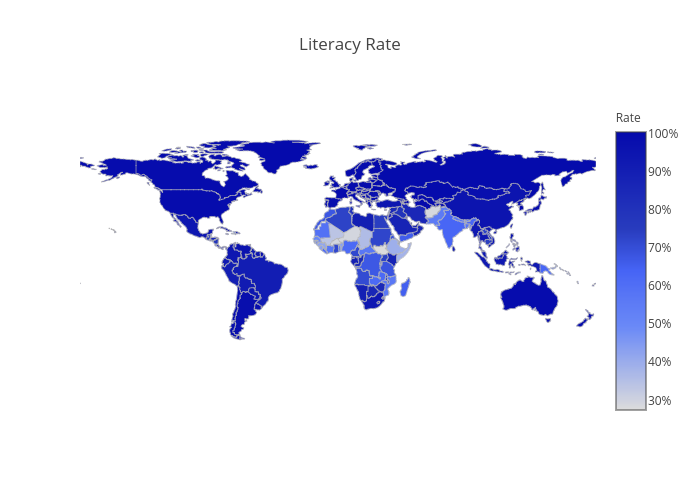

In [30]:
data = [ dict(
        type = 'choropleth',
        locations = plotDF['CODE'],
        z = plotDF['Literacy Rate (%)'],
        text = plotDF['Country Name'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            ticksuffix = '%',
            title = 'Rate'),
      ) ]

layout = dict(
    title = 'Literacy Rate<br>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='datamap-literacy-rate' )

The literacy rate of each nation is presented on the above data map. It can be seen that most of the countries have literacy rate greater than 90% and very few countries have less than 35% literacy rate. Data map makes it easier to visualize this information and compare for each nation. Also, it can be observed that countries with less literacy rate are neighbors/closer to each other and can be clustered.

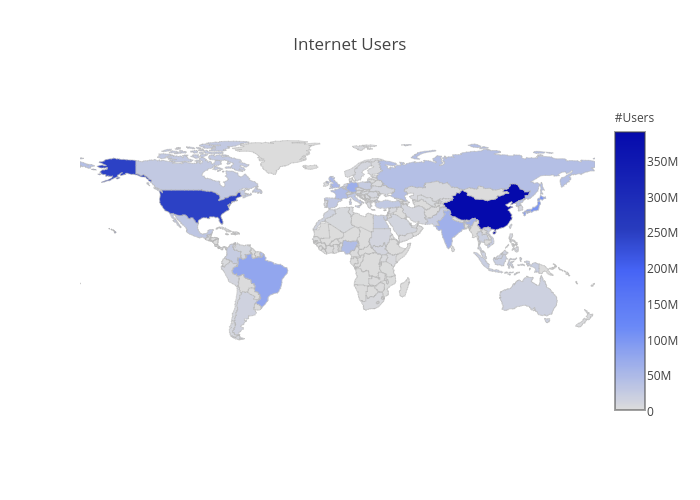

In [31]:
data = [ dict(
        type = 'choropleth',
        locations = plotDF['CODE'],
        z = plotDF['Internet Users (circa 2009)'],
        text = plotDF['Country Name'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            title = '#Users'),
      ) ]

layout = dict(
    title = 'Internet Users<br>',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='datamap-internet-users' )

Number of internet users in each nation is presented on the data map above. It can be seen that most of the internet users are from United States and China. From the previous data map and current one, it also can be inferred that nations with lower literacy rate have less number of internet users.

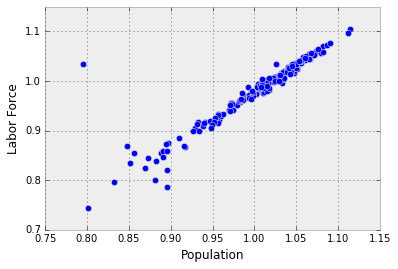

In [52]:
plt.scatter(np.log(np.log(np.log(cleanDF['Population'].values))), np.log(np.log(np.log(cleanDF['Labor Force'].values))), s =40)
plt.xlabel('Population')
plt.ylabel('Labor Force')
plt.show()

The above scatter plot shows that there is positive correlation between Population of a nation and the Labor Force. This means, as the population increases, the labor force also increases. We can also see that applying log to the features makes the visualization more clear and also reduces the overlap of points.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000CCE4940>]], dtype=object)

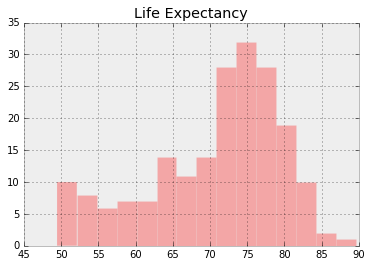

In [53]:
#cleanDF.hist(column ='Life Expectancy', color = 'r', alpha = 0.3, bins =15, cumulative = True)
cleanDF.hist(column ='Life Expectancy', color = 'r', alpha = 0.3, bins =15)

The above plots shows the distribution of Life Expectancy feature of all the nations. It is not completely bell curve, but the distribution is somewhat symmetric. It can be observed that more than half of the nations have life expectancy greater than 70 years also, very few nations have life expectancy greater than 85 years.

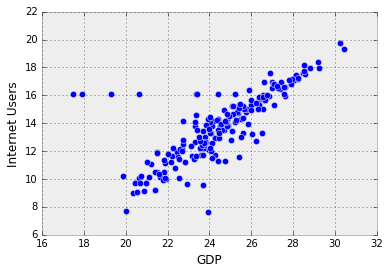

In [54]:
plt.scatter(np.log(cleanDF['GDP (PPP) in US $'].values), (np.log(cleanDF['Internet Users (circa 2009)'].values)),s=40)
plt.xlabel('GDP')
plt.ylabel('Internet Users')
plt.show()

This is another scatter plot which shows a positive correlation between GDP of a nation and the Internet Users. This is somewhat unusual relationship between GDP and Internet Users but, from what it depicts, it means that, as the GDP of that nation increases, the number of internet users also increases. However, before confirming this claim, it is important to check the significance of this relation so as to be sure that it has not occurred by chance.

In [55]:
#get a list of all possible permutations of variables
numericColsPermutations = list(itertools.permutations(numericalCols,2))

In [63]:
#compute pvalue
def doPermutationTest( x, y, coeff ):
    allCoeffs = []
    y = np.asarray(y)
    x = np.asarray(x)
    count = 0
    nPermutes = 1000
    for iterator in range( nPermutes ):
        np.random.shuffle(y)
        result = ss.pearsonr(x,y)
        if abs(result[0]) > abs(coeff):
            count = count + 1
    pval = float(count)/nPermutes
    return pval

In [65]:
#calculate the pearson coefficient using pearsonr api and test the significance of the coefficient.
posPairResult = [0,0]
negPairResult = [0,0]
for each in numericColsPermutations:
    a = cleanDF[each[0]]
    b = cleanDF[each[1]]
    result = ss.pearsonr(a,b)
    y = list(b)
    pval = doPermutationTest( a, y, result[0] )
    if result[0] > posPairResult[0]:
        posPairResult = [result[0], pval]
        posPair = each
    if result[0] < negPairResult[0]:
        negPairResult = [result[0], pval]
        negPair = each
        
#c = np.cov(a,b)[0][1]/(np.std(a)*np.std(b))
#print(negPairResult, negPair, posPairResult, posPair)

([-0.44182854796502863, 0.0], ('Life Expectancy', 'Commercial Prime Lending Rate'), [0.98017263003130195, 0.0], ('Population', 'Labor Force'))


In [66]:
#create output json
data = {
    "Email": "psonawane@cs.stonybrook.edu",
    "Name": "Pooja Sonawane",
    "SBUID": "110739621"
    }
Negative = {
    "Attr0": negPair[0],
    "Attr1": negPair[1],
    "coeff": '%.4f'%(negPairResult[0]),
    "pValue": '%.4f'%(negPairResult[1]) 
}
Positive = {
    "Attr0": posPair[0],
    "Attr1": posPair[1],
    "coeff": '%.4f'%(posPairResult[0]),
    "pValue": '%.4f'%(posPairResult[1])
}
data["Q2"] = { 
    "Negative" : Negative,
    "Positive" : Positive
}

- 'Life Expectancy' and 'Commercial Prime Lending Rate' are most negatively correlated. As the 'Life Expectancy' increases, 'Commercial Prime Lending Rate' decreases.
- 'Population' and 'Labor force' are most positively correlated. As the 'Population' increases, 'Labor Force' increases.

In [67]:
mse = np.inf
#get the true values of average income by dividing the total income by the population of that country
Y_matrix = np.array(cleanDF['GDP (PPP) in US $']/cleanDF['Population']).reshape(-1, 1)
Y_matrix = ss.zscore(Y_matrix,ddof=1)

numericalColsExceptGDP = ['Population','Life Expectancy','Area (sq km)','Land Boundaries (km)','Coastline (km)', \
                          'Literacy Rate (%)','Health Expenditure/GDP','Military Expenditure/GDP', \
                          'Renewable Water Resources (cu km)','Net Migration Rate/1000 Population', \
                          'Labor Force','Internet Users (circa 2009)','Commercial Prime Lending Rate']

for each in numericalColsExceptGDP:
    '''kf = KFold(len(X_matrix),5,shuffle = True)
    for train_index,test_index in kf:
        X_train = X_matrix[train_index].reshape(-1, 1)
        X_test = X_matrix[test_index].reshape(-1, 1)
        Y_train = Y_matrix[train_index]
        Y_test = Y_matrix[test_index]
        model = LinearRegression()
        model.fit(X_train,Y_train)
        predicted_Y  = model.predict(X_test)
        if mean_squared_error(Y_test,predicted_Y) < mse : 
            mse = mean_squared_error(Y_test,predicted_Y)
            minModel = model
            min_Y_train = Y_train
            min_X_train = X_train
            min_Y_test = Y_test
            min_X_test = X_test

    y_hats = minModel.predict(min_X_test)
    '''   
    X_matrix = np.array(cleanDF[each]).reshape(-1, 1)
    model = LinearRegression()
    X_matrix = ss.zscore(X_matrix,ddof=1)
    model.fit(X_matrix,Y_matrix)
    #y_trues = cleanDF['GDP (PPP) in US $']
    Y_predicted = model.predict(X_matrix)
    
    #use mean_squared_error api to get the mean squared error
    squaredError = mean_squared_error(Y_matrix,Y_predicted)
    if squaredError < mse :
        mse = squaredError
        feature = each
        
    #print squared error for each model
    print(squaredError,each) 

mse = '%.4f'%(mse)

(0.99222687705220147, 'Population')
(0.66561796620907865, 'Life Expectancy')
(0.99276218672332672, 'Area (sq km)')
(0.96447870967899507, 'Land Boundaries (km)')
(0.97717733490814429, 'Coastline (km)')
(0.81650824537462385, 'Literacy Rate (%)')
(0.99332931591527818, 'Health Expenditure/GDP')
(0.99487438982930354, 'Military Expenditure/GDP')
(0.99484581643522829, 'Renewable Water Resources (cu km)')
(0.95921267907094265, 'Net Migration Rate/1000 Population')
(0.99332032768409417, 'Labor Force')
(0.98764623778530369, 'Internet Users (circa 2009)')
(0.85902192144334677, 'Commercial Prime Lending Rate')


Above figures are squared error for each respective regression model.

In [68]:
#write to json object
data["Q3"] = {
    "Attr": feature,
    "SquaredError": mse
}

In [69]:
#predict the average income using the model with minimum squared error
X_matrix = np.array(cleanDF[feature]).reshape(-1, 1)
model = LinearRegression()
model.fit(X_matrix,Y_matrix)
Y_predicted = model.predict(X_matrix)
diff = Y_predicted - Y_matrix
diffDict = []
names=list(cleanDF['Country Name'])
for i in range(len(cleanDF)):
        diffDict.append(( names[i], diff[i][0], X_matrix[i][0], Y_predicted[i][0], Y_matrix[i][0]))
diffDict = sorted(diffDict, key=lambda tup: tup[1])
abv5 = np.asarray(diffDict[:5])
blw5 = np.asarray(diffDict[-5:])
#print countries and error in their forcast
print('Regression coefficient with feature as : ',feature, model.coef_[0][0])
print('Countries most above the forcast:')
print(abv5)
print('Countries most below the forcast: ')
print(blw5)

('Regression coefficient with feature as : ', 'Life Expectancy', 0.064473208489849207)
Countries most above the forcast:
[['Monaco' '-7.53329405429' '89.57' '1.21866800502' '8.75196205931']
 ['Qatar' '-3.11466552315' '78.38' '0.497212802021' '3.61187832517']
 ['Liechtenstein' '-2.53642852889' '81.68' '0.709974390038' '3.24640291893']
 ['Luxembourg' '-2.46620636382' '80.01' '0.60230413186' '3.06851049568']
 ['Kuwait' '-1.61491439469' '77.64' '0.449502627739' '2.06441702243']]
Countries most below the forcast: 
[['Georgia' '0.826104573321' '75.72' '0.325714067438' '-0.500390505882']
 ['Paraguay' '0.834283557244' '76.8' '0.395345132607' '-0.438938424637']
 ['Sri Lanka' '0.837766055034' '76.35' '0.366332188787' '-0.471433866248']
 ['Morocco' '0.880506752635' '76.51' '0.376647902145' '-0.50385885049']
 ['Solomon Islands' '0.88095950313' '74.89' '0.272201304392'
  '-0.608758198738']]


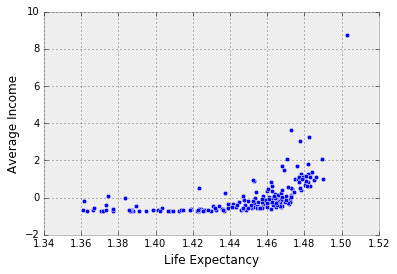

In [70]:
plt.scatter(np.log(np.log(cleanDF['Life Expectancy'].values)), (Y_matrix))
plt.xlabel('Life Expectancy')
plt.ylabel('Average Income')
plt.show()

The above figure shows that there is a positive correlation between average income and life expectancy.

- When we predict average income by using 'Life Expectancy', Monaco, Qatar, Liechtenstein, Luxembourg, Kuwait are the countries which are most above the forcast. Whereas, Georgia, Paraguay, Sri Lanka, Morocco, Solomon Islands are most below the forcast.
- Why this happens?
- As we can see above, Life Expectancy is positively correlated to average income. So, if the expectancy is more, the forcasted value is more. For Georgia, Life Expectancy is 75.72 so, the average income forcasted is more, i.e. 0.3257 but, the actual income is much below the forcasted value, i.e. -0.5003. Similarly, for Monaco, the expectancy is 89.57 and accordingly the average income is predicted to be 1.2186 but, the actual is much above the forcasted value, i.e. 8.7519.

In [71]:
#write output to json file
with open('HW2.json', 'w') as outfile:
    json.dump(data, outfile,sort_keys=True)

In [72]:
#normalize data
normalisedDF = cleanDF.copy()
numericalCols.extend(['Health Expenditure', 'Military Expenditure','Labor Force Rate (%)', 'Net Migration', \
                      'Internet Users Rate (%)'])
normalisedDF[numericalCols] = (cleanDF[numericalCols] - cleanDF[numericalCols].mean())/cleanDF[numericalCols].std()

In [73]:
#score function to rank the countries
def scoreFunction(each):
    social = (0.05 * each['Internet Users Rate (%)']) + (0.25 * each['Literacy Rate (%)']) + \
    (0.25 * (each['Health Expenditure'])) + (0.05 *(each['Labor Force Rate (%)'])) + \
    (0.05 * (each['Military Expenditure'])) + (0.25 * each['Life Expectancy']) + \
    (0.15 * each ['Renewable Water Resources (cu km)']) + (0.05 * each ['Net Migration Rate/1000 Population']) - \
    (0.05 * each['Population']) - (0.05 * each['Area (sq km)'])  
    return social
normalisedDF['social'] = normalisedDF.apply (lambda row: scoreFunction(row),axis=1)
normalisedDF['socialRanked'] = normalisedDF['social'].rank(ascending=False)
sortedOnScore = normalisedDF.sort_values(['socialRanked'])
sortedOnScore.socialRanked = sortedOnScore.socialRanked.astype(np.int64)
print(sortedOnScore[['Country Name', 'socialRanked']].to_string(justify ='left' ,index=False))

Country Name                        socialRanked
                           Monaco    1         
                    United States    2         
                    Liechtenstein    3         
                           Canada    4         
                       Luxembourg    5         
                           Brazil    6         
                           Norway    7         
                      Switzerland    8         
                      Netherlands    9         
                        Singapore   10         
                          Austria   11         
                          Germany   12         
                           France   13         
                           Sweden   14         
                            Japan   15         
                          Belgium   16         
                            Nauru   17         
                          Denmark   18         
                        Australia   19         
                       San Marino   20 

- The above scoring function assigns a social score to each country and then ranks each country based on its social score. According to this function, Monaco, United States, Liechtenstein, Luxembourg, Norway, Switzerland, Canada, Netherlands are among the top ranking countries whereas, Ethiopia, South Sudan, Mali, Burkina Faso, Niger, Somalia, Chad, Afghanistan are the low ranking countries. To some extent, this ranking matches the ranking of countries based on Social Progress as given on Wikipedia.                     
- There are various factors which are taken into account for calculating the social score of a country, which are : Internet Users Rate (%), Literacy Rate (%), Health Expenditure, Labor Force Rate (%), Military Expenditure, Life Expectancy, Renewable Water Resources (cu km), Net Migration Rate/1000 Population, Population, Area (sq km). Based on the data, I observed that countries with more Internet Users Rate (%), Literacy Rate (%), Health Expenditure, Labor Force Rate (%), Military Expenditure, Life Expectancy, Renewable Water Resources (cu km), Net Migration Rate/1000 ranked higher, i.e., the had higher social welfare score whereas, lower the Population and Area of that country, the better, i.e., smaller countries and lesser population tend to improve the social welfare of a country. Based on this observation, weights are assigned to these features accordingly, in the scoring function.
- The funcion gives really good results for some countries, especially higher and lower ranking countries like, Norway, Netherlands, Sweden are ranked higher correctly and countries like Niger, Chad, Afghanistan are ranked lower correctly. However, it goofs up in the middle ranked countries like China, Sri Lanka.
- As we have seen, the function performs well for most of the countries and ranks them correctly but, for some of the countries it gives incorrect results. For instance, the ranks of India and Brazil according to above function are 175 and 6 respectively, whereas, according to Wikipedia, their respective ranks are 101 and 42. It may be possible because factors like Population and Area are given negative weights in the function, this fits well for countries like Norway, Switzerland, etc but, fails for India, Brazil and similar other countries. Also, the data for Internet Users is till 2009, had it been the latest one, then it could have improved scoring a bit.

In [74]:
from scipy import spatial
neighbors = dict()
allCombinations = list(itertools.combinations(range(len(normalisedDF)),2))
dstCols = ['Latitude Decimal', 'Longitude Decimal','Population','Life Expectancy',\
           'GDP (PPP) in US $','Area (sq km)','Land Boundaries (km)','Coastline (km)',\
           'Literacy Rate (%)','Health Expenditure','Military Expenditure',\
           'Renewable Water Resources (cu km)','Net Migration Rate/1000 Population',\
           'Labor Force Rate (%)','Internet Users Rate (%)','Commercial Prime Lending Rate','social']
def findDistance( a, b ):
    dst = 1 - spatial.distance.cosine(a, b)
    return dst
for each in allCombinations:
    dst = findDistance(normalisedDF.ix[each[0]][dstCols].values, \
                       normalisedDF.ix[each[1]][dstCols].values)
    
    try:
        if(neighbors[normalisedDF.ix[each[0]]['Country Name']]['nearSimilarity'] < dst):
            neighbors[normalisedDF.ix[each[0]]['Country Name']]['nearSimilarity'] = dst
            neighbors[normalisedDF.ix[each[0]]['Country Name']]['nearNeighbor'] = \
            normalisedDF.ix[each[1]]['Country Name']        
    except KeyError:
        neighbors[normalisedDF.ix[each[0]]['Country Name']] = dict(
        nearSimilarity = dst,
        nearNeighbor = normalisedDF.ix[each[1]]['Country Name'],
        farDifference = dst,
        farNeighbor = normalisedDF.ix[each[1]]['Country Name']
        )
    try:
        if(neighbors[normalisedDF.ix[each[1]]['Country Name']]['nearSimilarity'] < dst):
            neighbors[normalisedDF.ix[each[1]]['Country Name']]['nearSimilarity'] = dst
            neighbors[normalisedDF.ix[each[1]]['Country Name']]['nearNeighbor'] = \
            normalisedDF.ix[each[0]]['Country Name']        
    except KeyError:
        neighbors[normalisedDF.ix[each[1]]['Country Name']] = dict(
        nearSimilarity = dst,
        nearNeighbor = normalisedDF.ix[each[0]]['Country Name'],
        farDifference = dst,
        farNeighbor = normalisedDF.ix[each[0]]['Country Name']
        )
    if(neighbors[normalisedDF.ix[each[0]]['Country Name']]['farDifference'] > dst):
        neighbors[normalisedDF.ix[each[0]]['Country Name']]['farDifference'] = dst
        neighbors[normalisedDF.ix[each[0]]['Country Name']]['farNeighbor'] = \
        normalisedDF.ix[each[1]]['Country Name']
    
    if(neighbors[normalisedDF.ix[each[1]]['Country Name']]['farDifference'] > dst):
        neighbors[normalisedDF.ix[each[1]]['Country Name']]['farDifference'] = dst
        neighbors[normalisedDF.ix[each[1]]['Country Name']]['farNeighbor'] = \
        normalisedDF.ix[each[0]]['Country Name']
        
        
neighborTable = pd.DataFrame(neighbors).T
neighborTable.fillna(0, inplace=True)

In [75]:
pd.set_option('display.height', 500)
pd.set_option('display.max_rows', 500)
neighborTable

height has been deprecated.



farDifference          farNeighbor  \
Afghanistan                            -0.998534                Chile   
Albania                                -0.841708              Uruguay   
Algeria                                -0.741122              Namibia   
Andorra                                -0.774544              Namibia   
Angola                                 -0.987506           Cabo Verde   
Antigua and Barbuda                    -0.998855              Comoros   
Argentina                              -0.998688               Kuwait   
Armenia                                -0.983152              Uruguay   
Australia                              -0.999503              Jamaica   
Austria                                -0.770141              Uruguay   
Azerbaijan                             -0.991453              Uruguay   
Bahamas, The                           -0.999022            Mauritius   
Bahrain                                -0.998070                Chile   
Bangladesh                             -0.999036              Bolivia   
Barbados                               -0.999135          New Zealand   
Belarus                                -0.855792              Uruguay   
Belgium                                -0.741482              Namibia   
Belize                                 -0.999063          New Zealand   
Benin                                  -0.746397              Uruguay   
Bhutan                                 -0.997748              Bolivia   
Bolivia                                -0.999508                Japan   
Bosnia and Herzegovina                 -0.814052              Uruguay   
Botswana                               -0.989356            Greenland   
Brazil                                 -0.975296             Djibouti   
Brunei                                 -0.998969                Samoa   
Bulgaria                               -0.869232              Uruguay   
Burkina Faso                           -0.807588              Namibia   
Burma                                  -0.998394                 Peru   
Burundi                                -0.997689               Panama   
Cabo Verde                             -0.991893               Zambia   
Cambodia                               -0.999781                Tonga   
Cameroon                               -0.978371                Chile   
Canada                                 -0.985098               Zambia   
Central African Republic               -0.983698              Bolivia   
Chad                                   -0.972378              Uruguay   
Chile                                  -0.999119             Pakistan   
China                                  -0.988578             Paraguay   
Colombia                               -0.999419      Solomon Islands   
Comoros                                -0.998987                 Cuba   
Congo, Democratic Republic of the      -0.978036  Antigua and Barbuda   
Congo, Republic of the                 -0.992550  Antigua and Barbuda   
Costa Rica                             -0.999691              Vanuatu   
Cote d'Ivoire                          -0.933984              Lesotho   
Croatia                                -0.777115              Uruguay   
Cuba                                   -0.998987              Comoros   
Cyprus                                 -0.965797              Uruguay   
Czech Republic                         -0.741246              Uruguay   
Denmark                                -0.699914              Uruguay   
Djibouti                               -0.998543              Bolivia   
Dominica                               -0.999404          New Zealand   
Dominican Republic                     -0.999285          New Zealand   
Ecuador                                -0.999880             Kiribati   
Egypt                                  -0.977568              Uruguay   
El Salvador                            -0.998634              Vanuatu   
Equatorial Guinea   

In [76]:
#t = pd.DataFrame(neighbors)
#t.to_csv('C:\TempDrive\MS\Fall16\DataScience\Assignment2\\neighbors.csv')

The above table shows the nearest and farthest neighbor to each nation and their similarity/difference score. Various features are used to calculate the distance between two nations some of which include, the latitude and longitude of nation's capital, population, area, literacy rate, etc.
(a) The distance function captures quite interesting similarities and differences for most of the nations. For instance, as seen from the above table, the nearest neighbor of India is China and the farthest one is Paraguay, which we can say is correct because, both India and China are close to each other geographically whereas Paraguay is a bit far from India, also, both India and China have more population, where as there is significant amount of difference between populations of India and Paraguay. Similar kind of pairs can be observed to be correctly computed by the distance function such as nearest neighbor for USA is Canada which is correct given the fact that they are closer geographically, are equally large as compared to area.
(b) Though the metric captures many interesting pairs, there are some pairs which fall out of the analysis. For instance, countries like Niger and Nigeria are most similar compared to social welfare, area, culture, geographic location. But still they are not neighbors according to the above function. Similarly, there are other few intersting nations whose distances are not captured correctly.
(c) There are few nations which have same nation as their farthest neighbor, despite of certain similarities in the two nations. For instance, Uruguay is the farthest neighbor of many nations like Moldova, Malta, Macedonia, Montenegro, Nauru and many more. But, there are many features of these nations which are similar to Uruguay, still they are farthest neighbors. Also, for some nations there are other nations which are far from them but the metric is not able to capture it. Maybe, adding weights to the feature while calculating distance, help to improve the function. Overall, the function captures many surprising near neighbors correctly but, the farthest neighbors are sometimes not so interesting.